<a href="https://colab.research.google.com/github/Pravalka/Autism-Prediction/blob/main/Autism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train.csv', index_col='ID')


In [ ]:
print('Total instances in the dataset: ', df.shape[0])
print('Total columns in the dataset: ', df.shape[1])

Total instances in the dataset:  800
Total columns in the dataset:  21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result           800 

In [ ]:
df.head() #Check few rows in the datset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
2,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
3,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
4,0,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
5,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


<Axes: ylabel='ID'>

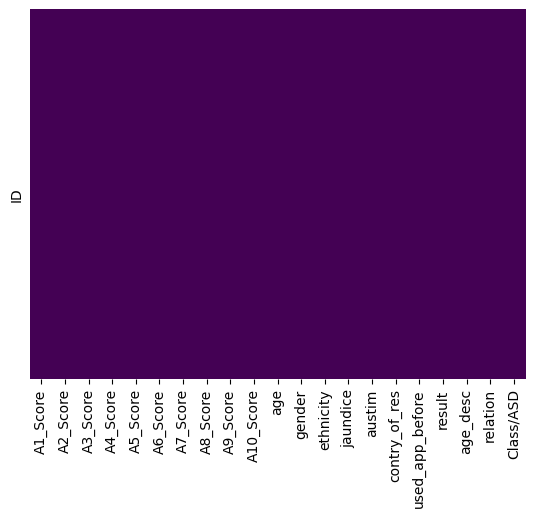

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

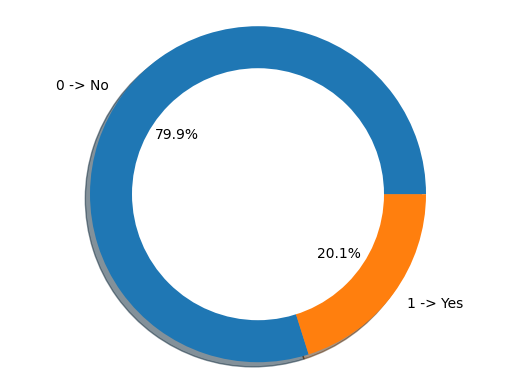

In [ ]:
plt.pie(df['Class/ASD'].value_counts(), labels=['0 -> No','1 -> Yes'], autopct='%1.1f%%', shadow=True)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

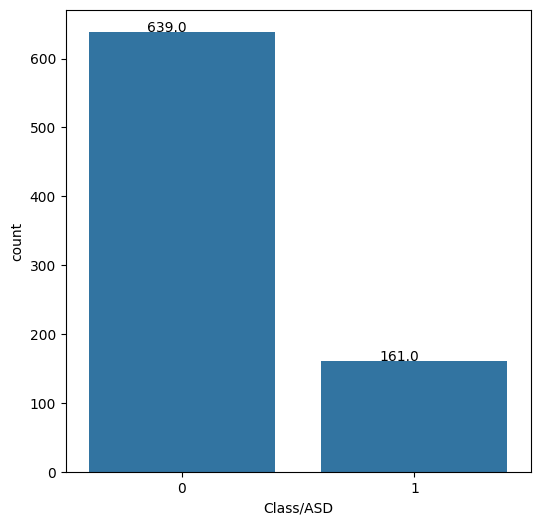

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Class/ASD', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [ ]:
df['gender'].value_counts()

gender
m    530
f    270
Name: count, dtype: int64

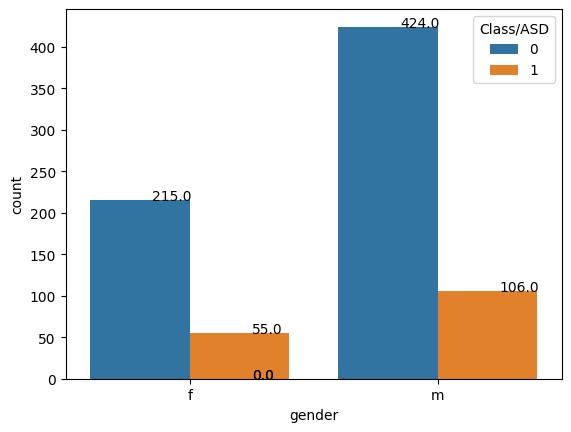

In [ ]:
ax = sns.countplot(x='gender', data=df, hue='Class/ASD')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [ ]:
#Checking unique values in the categorical columns
for col in df.columns:
    print(col,':')
    n = df[col].nunique()

    if n < 25:
        print(df[col].unique())


A1_Score :
[1 0]
A2_Score :
[0 1]
A3_Score :
[1 0]
A4_Score :
[0 1]
A5_Score :
[1 0]
A6_Score :
[0 1]
A7_Score :
[1 0]
A8_Score :
[0 1]
A9_Score :
[1 0]
A10_Score :
[1 0]
age :
gender :
['f' 'm']
ethnicity :
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice :
['no' 'yes']
austim :
['no' 'yes']
contry_of_res :
used_app_before :
['no' 'yes']
result :
age_desc :
['18 and more']
relation :
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']
Class/ASD :
[0 1]


# **Data visualizations for trained data**

In [ ]:
# 'age_desc' column has only one value - ['18 and more']

df.drop('age_desc', axis=1, inplace= True)


In [ ]:
#Creating dataframe containing only String column
cat_cols = [df[x].dtype == 'object' for x in  df]

<ipython-input-45-2f2bca3cf94a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['result'], ax= axes[0],bins=20, kde=False)
<ipython-input-45-2f2bca3cf94a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class/ASD']== 1]['age'], ax= axes[1],bins=20, kde=True)


<Axes: xlabel='age', ylabel='Density'>

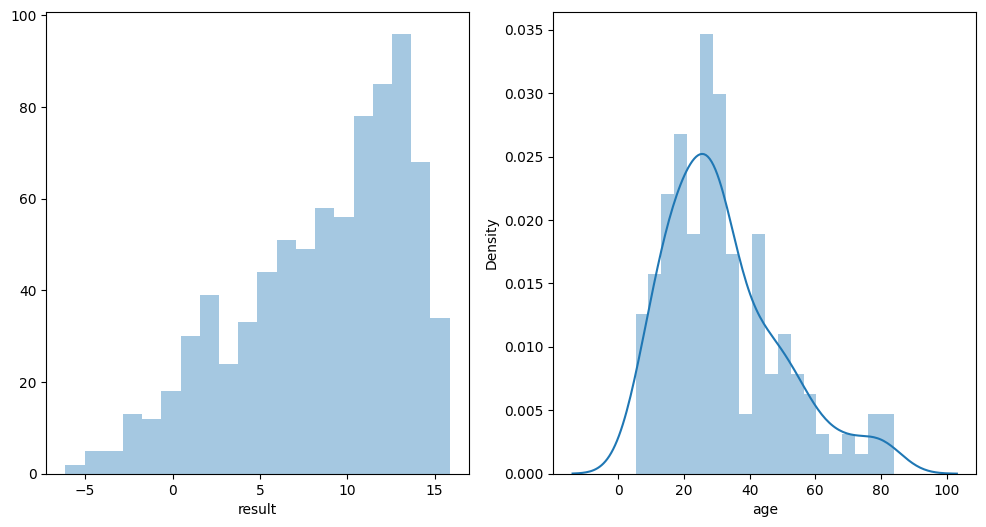

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(df['result'], ax= axes[0],bins=20, kde=False)
sns.distplot(df[df['Class/ASD']== 1]['age'], ax= axes[1],bins=20, kde=True)

<Axes: xlabel='age', ylabel='result'>

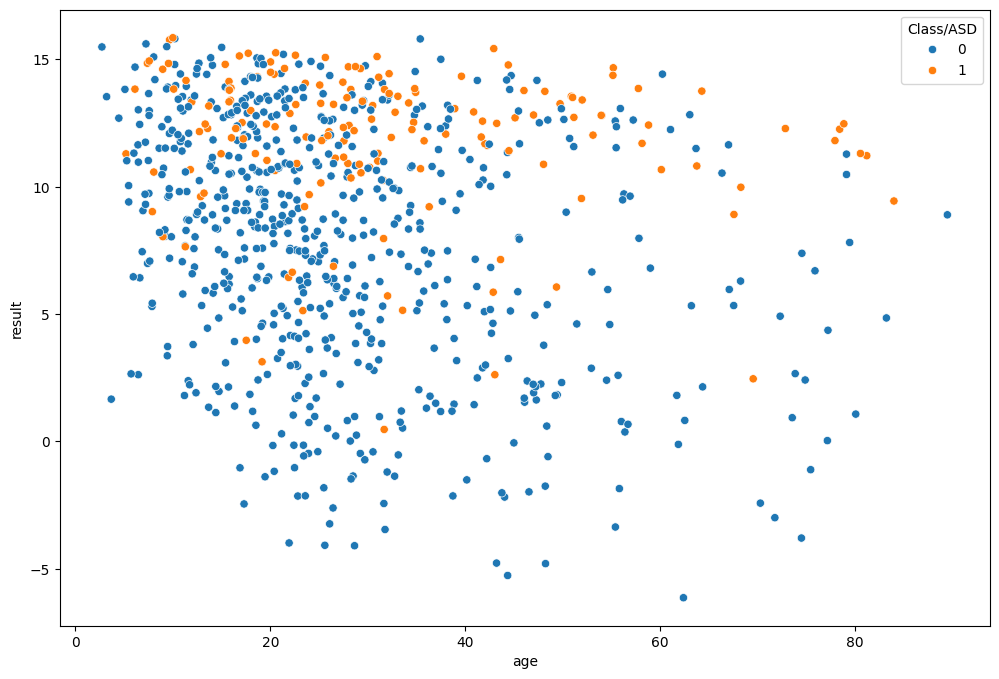

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='result', data=df, hue='Class/ASD')

In [ ]:
num_df = df.select_dtypes(include='number') #Creating dataframe with numeric columns

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   800 non-null    int64  
 1   A2_Score   800 non-null    int64  
 2   A3_Score   800 non-null    int64  
 3   A4_Score   800 non-null    int64  
 4   A5_Score   800 non-null    int64  
 5   A6_Score   800 non-null    int64  
 6   A7_Score   800 non-null    int64  
 7   A8_Score   800 non-null    int64  
 8   A9_Score   800 non-null    int64  
 9   A10_Score  800 non-null    int64  
 10  age        800 non-null    float64
 11  result     800 non-null    float64
 12  Class/ASD  800 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 87.5 KB


In [ ]:
cat_df = df.select_dtypes(include='object')

In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           800 non-null    object
 1   ethnicity        800 non-null    object
 2   jaundice         800 non-null    object
 3   austim           800 non-null    object
 4   contry_of_res    800 non-null    object
 5   used_app_before  800 non-null    object
 6   relation         800 non-null    object
dtypes: object(7)
memory usage: 50.0+ KB


<Axes: >

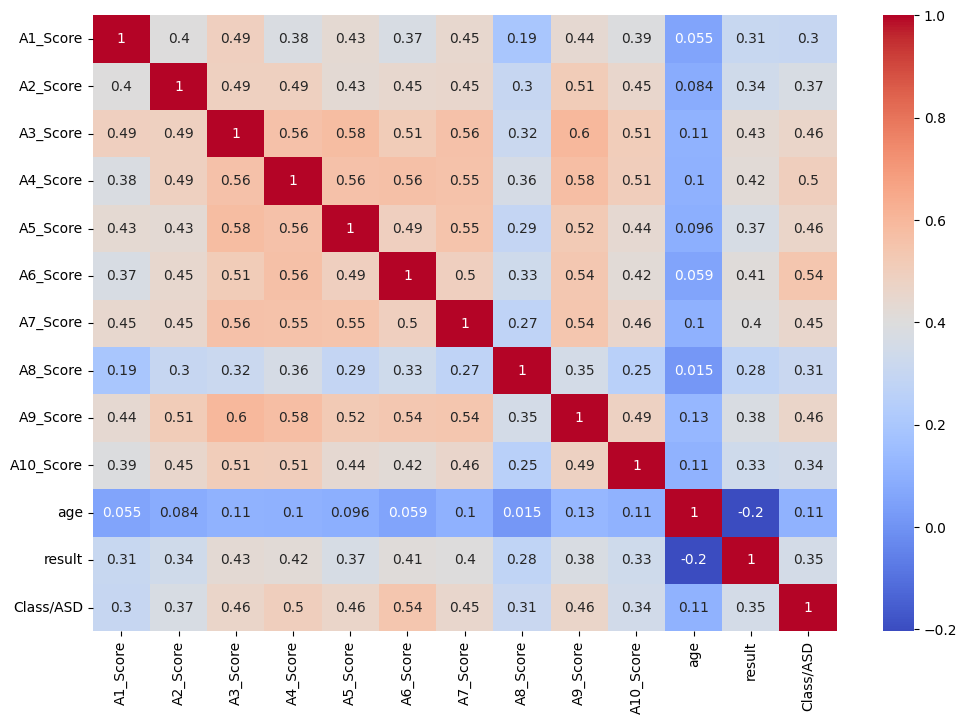

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(num_df.corr(), annot= True, cmap='coolwarm')

In [ ]:
# Created list of columns name
col = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
     'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','result','age']

# Loop creates feature crosses and check correlation of that feature cross with target column.
#If correlation is higher than 0.56 than it saved that feature cross in the dataframe 'final'
temp = pd.DataFrame(df['Class/ASD'])
final = pd.DataFrame()
for i in range(len(col)-1):

    for j in range(len(col)-1):
        temp['y'] = df[col[i]] * df[col[j]]
        cor = temp.corr()
        if cor.iloc[0][1] > 0.56:
            final[col[i]+col[j]] = temp['y']

In [ ]:
final.shape

(800, 12)

In [ ]:
final.head()

,A4_ScoreA6_Score,A5_ScoreA6_Score,A6_ScoreA4_Score,A6_ScoreA5_Score,A6_ScoreA7_Score,A6_ScoreA8_Score,A6_ScoreA9_Score,A6_ScoreA10_Score,A7_ScoreA6_Score,A8_ScoreA6_Score,A9_ScoreA6_Score,A10_ScoreA6_Score
ID,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final = pd.concat([df, final], axis=1)

In [ ]:
df_final.shape

(800, 32)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1_Score           800 non-null    int64  
 1   A2_Score           800 non-null    int64  
 2   A3_Score           800 non-null    int64  
 3   A4_Score           800 non-null    int64  
 4   A5_Score           800 non-null    int64  
 5   A6_Score           800 non-null    int64  
 6   A7_Score           800 non-null    int64  
 7   A8_Score           800 non-null    int64  
 8   A9_Score           800 non-null    int64  
 9   A10_Score          800 non-null    int64  
 10  age                800 non-null    float64
 11  gender             800 non-null    object 
 12  ethnicity          800 non-null    object 
 13  jaundice           800 non-null    object 
 14  austim             800 non-null    object 
 15  contry_of_res      800 non-null    object 
 16  used_app_before    800 non-null

In [ ]:
df = df_final.copy()

In [ ]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [ ]:
df['relation'].replace('?', df['relation'].value_counts().index[0], inplace= True)

In [ ]:
df['relation'].value_counts()

relation
Self                        749
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [ ]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [ ]:
df['ethnicity'].replace('?', df['ethnicity'].value_counts().index[0], inplace= True)

In [ ]:
df['ethnicity'].value_counts()

ethnicity
White-European     460
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [ ]:
df['contry_of_res'].value_counts()
#This column doesnt contain any null or unkown values

contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia                   3
Serbia

In [ ]:
cat_feats = ['gender', 'contry_of_res','ethnicity','jaundice','used_app_before', 'relation', 'austim']

In [ ]:
df_new = pd.get_dummies(df, columns=cat_feats, drop_first= True)

In [ ]:
df_new.shape

(800, 98)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_new.drop('Class/ASD', axis=1), df['Class/ASD'], test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((600, 97), (600,), (200, 97), (200,))

Handling imbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train,y_train)

In [ ]:
X_train = oversampled_X.copy()
y_train = oversampled_Y.copy()

In [ ]:
y_train.value_counts()

Class/ASD
0    481
1    481
Name: count, dtype: int64

## **Model Training**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
lg = LogisticRegression(solver='saga',max_iter=4000)
lg.fit(X_train, y_train) #Training ML model using training data

LogisticRegression(max_iter=4000, solver='saga')

In [ ]:
pred = lg.predict(X_val) #Making prediction on validation data (unseen data)

In [ ]:
#Measuring performance of the model
print('Accuracy using Logistic Regression: ', accuracy_score(y_val, pred))
print('F1-Score using Logistic Regression: ', f1_score(y_val, pred) )

Accuracy using Logistic Regression:  0.87
F1-Score using Logistic Regression:  0.6976744186046512


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
pred = rf.predict(X_val) #Making prediction on validation data

In [ ]:
#Measuring performance of the model
print('Accuracy using Random Forest: ', accuracy_score(y_val, pred))
print('F1-Score using Random Forest: ', f1_score(y_val, pred) )

Accuracy using Random Forest:  0.875
F1-Score using Random Forest:  0.6987951807228916


## Artificial Neural Network(ANN)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
#Created NN model with 2 hidden layers

ann = models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1],)), #Input layer
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),  #For regularization to handle overfitting
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3), #For regularization to handle overfitting
    layers.Dense(1, activation='sigmoid') #Output Layer

    ])

In [ ]:
ann.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are your training data
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the numeric features if needed (for example, using StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Ensure the data types are correct
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_train = y_train.astype(np.int32)
y_val = y_val.astype(np.int32)

# Now, you can fit your model
ann.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
25/25 [==============================] - 7s 38ms/step - loss: 0.5492 - accuracy: 0.7438 - val_loss: 0.4027 - val_accuracy: 0.8601
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3719 - accuracy: 0.8466 - val_loss: 0.3424 - val_accuracy: 0.8601
Epoch 3/20
25/25 [==============================] - 0s 14ms/step - loss: 0.3126 - accuracy: 0.8700 - val_loss: 0.3116 - val_accuracy: 0.8860
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 0.2814 - accuracy: 0.8817 - val_loss: 0.2908 - val_accuracy: 0.8912
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 0.2513 - accuracy: 0.9077 - val_loss: 0.2828 - val_accuracy: 0.8808
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.9129 - val_loss: 0.2727 - val_accuracy: 0.8808
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2155 - accuracy: 0.9155 - val_loss: 0.2721 - val_accuracy: 0.8808
Epoch 8/20
25/2

In [ ]:
pred = ann.predict(X_val)

7/7 [==============================] - 0s 5ms/step


In [ ]:
pred = np.where(pred < 0.50, 0, 1)

In [ ]:
#Measuring performance of the model
print('Accuracy using Neural Network: ', accuracy_score(y_val, pred))
print('F1-Score using Neural Network: ', f1_score(y_val, pred) )

Accuracy using Neural Network:  0.9015544041450777
F1-Score using Neural Network:  0.9064039408866995
